In [1]:
import joblib
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [2]:
#abrindo csv para treino
train_df = pd.read_csv("./Datasets/news_headlines.csv")
print(train_df.head())


                                                post      tags
0  após quentinhas e alimentação cortada vasco ac...   esporte
1  até os <digit><digit> dá para sonhar diz idoso...  educacao
2  brigadeiro da aprovação oração mãe e filha jun...  educacao
3  estou preparada diz filha de professora e cand...  educacao
4  hamburgada do bem feita por professora do rj f...  educacao


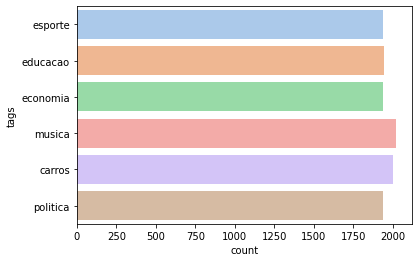

In [3]:
graf = sns.countplot(y="tags",data=train_df, palette="pastel")

graf
#salvando grafico no formato png
#graf.figure.savefig("grafico_balanceamento.png")


In [4]:
label = LabelEncoder()


In [5]:
#visualizando em formato numerico
y = label.fit_transform(train_df['tags']) #y atribui as classes
y


array([3, 2, 2, ..., 3, 4, 3])

In [6]:
#preparando treinamento
x_train, x_test, y_train, y_test = train_test_split(train_df['post'], y, test_size=0.2,random_state=5)


In [7]:
#criando pipeline
pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('clf',LinearSVC())
])
#treinando classificador
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [8]:
pred = pipeline.predict(x_test)

In [9]:
#dados preditados pelo modelos
pred

array([2, 2, 1, ..., 5, 1, 5])

In [10]:
#dados reais para testa  o modelo
y_test

array([2, 2, 1, ..., 5, 1, 5])

In [11]:
#acuracia geral do modelo
accuracy_score(y_test, pred)

0.9103653355989805

In [12]:
#acuracia media para cada classe
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       389
           1       0.81      0.80      0.80       396
           2       0.95      0.93      0.94       403
           3       0.94      0.94      0.94       393
           4       0.95      0.96      0.95       413
           5       0.87      0.88      0.87       360

    accuracy                           0.91      2354
   macro avg       0.91      0.91      0.91      2354
weighted avg       0.91      0.91      0.91      2354



In [13]:
#exibindos as classes
label.classes_

array(['carros', 'economia', 'educacao', 'esporte', 'musica', 'politica'],
      dtype=object)

In [16]:
#teste para ver se o modelo consegui classificar noticias aleatoria
text_noticia = "jogando bola"

prediction = pipeline.predict([text_noticia])

#exibindo a classe identificada
label.inverse_transform(prediction)[0]

'esporte'

In [14]:
#exportando modelo para producao
joblib.dump(pipeline, "classificador_model.joblib")

['classificador_model.joblib']